# Método del codo y el factor de la silueta del clustering

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [5]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

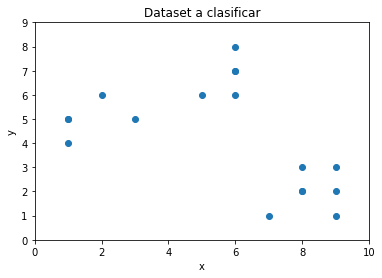

In [10]:
plt.plot()
plt.xlim([min(x1)-1,max(x1)+1])
plt.ylim([min(x2)-1,max(x2)+1])
plt.title('Dataset a clasificar')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x1,x2)
plt.show()

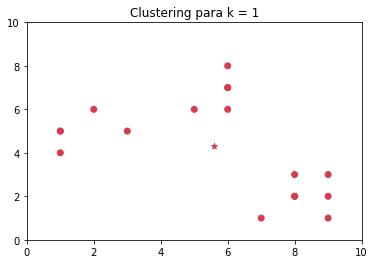

* Para k =  2  el promedio de la silueta es de : 0.6113424368705715
   - Para i =  1  la silueta del cluster vale :  0.49704450958269375
   - Para i =  2  la silueta del cluster vale :  0.7746251901389686


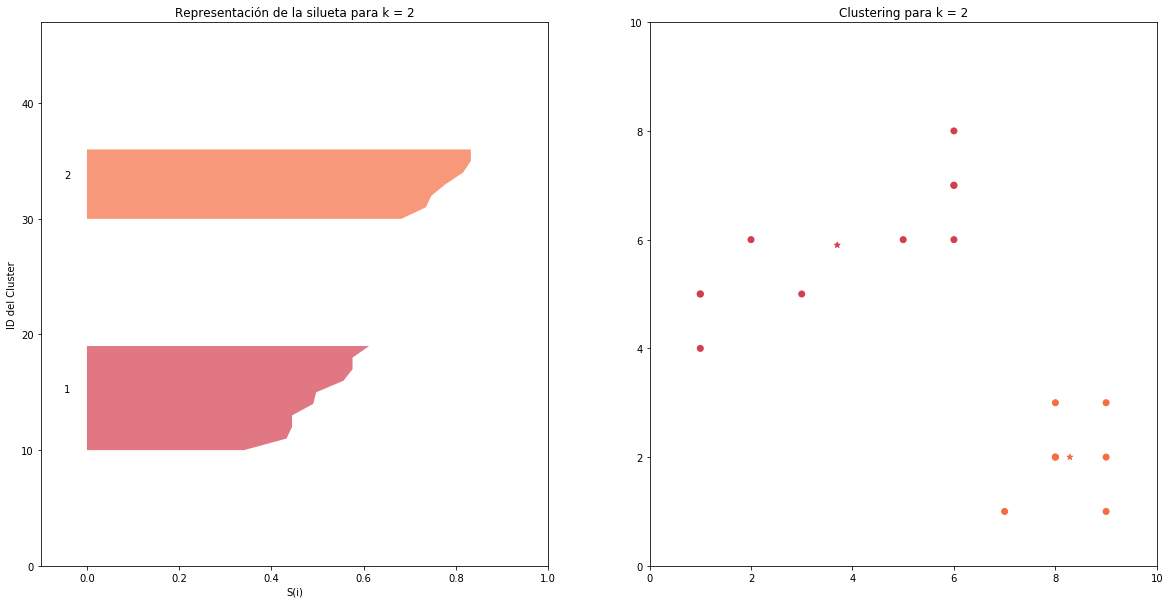

* Para k =  3  el promedio de la silueta es de : 0.7122079383287169
   - Para i =  1  la silueta del cluster vale :  0.7345257364682265
   - Para i =  2  la silueta del cluster vale :  0.6609508863896014
   - Para i =  3  la silueta del cluster vale :  0.7322200728725188


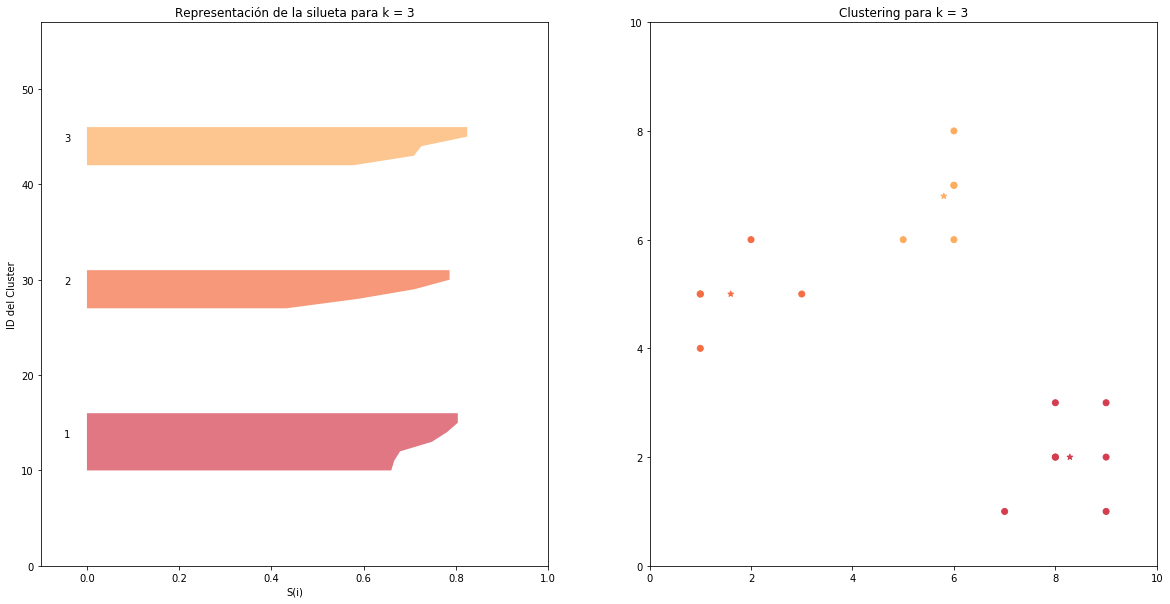

* Para k =  4  el promedio de la silueta es de : 0.6389948643127632
   - Para i =  1  la silueta del cluster vale :  0.24096929517637128
   - Para i =  2  la silueta del cluster vale :  0.7345257364682265
   - Para i =  3  la silueta del cluster vale :  0.654458796162702
   - Para i =  4  la silueta del cluster vale :  0.655666655624379


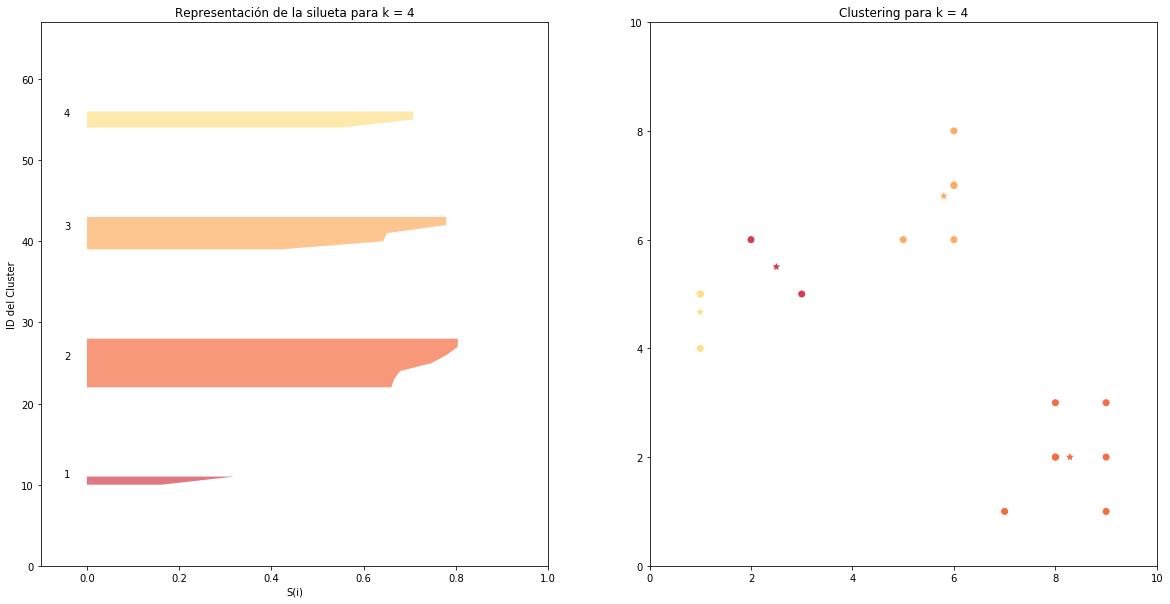

* Para k =  5  el promedio de la silueta es de : 0.5730476047724169
   - Para i =  1  la silueta del cluster vale :  0.32882042637679976
   - Para i =  2  la silueta del cluster vale :  0.7051132786996257
   - Para i =  3  la silueta del cluster vale :  0.655666655624379
   - Para i =  4  la silueta del cluster vale :  0.24096929517637128
   - Para i =  5  la silueta del cluster vale :  0.5664789734180768


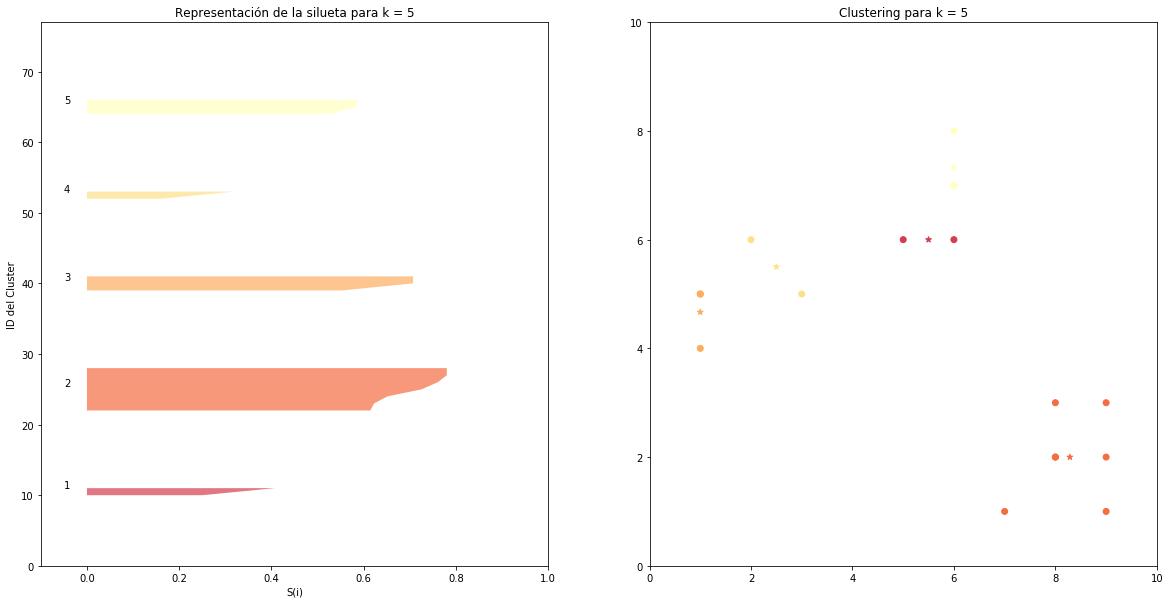

* Para k =  6  el promedio de la silueta es de : 0.39661977826122785
   - Para i =  1  la silueta del cluster vale :  0.42346712707864664
   - Para i =  2  la silueta del cluster vale :  0.24096929517637128
   - Para i =  3  la silueta del cluster vale :  0.5664789734180768
   - Para i =  4  la silueta del cluster vale :  0.32882042637679976
   - Para i =  5  la silueta del cluster vale :  0.655666655624379
   - Para i =  6  la silueta del cluster vale :  -0.09040786759303471


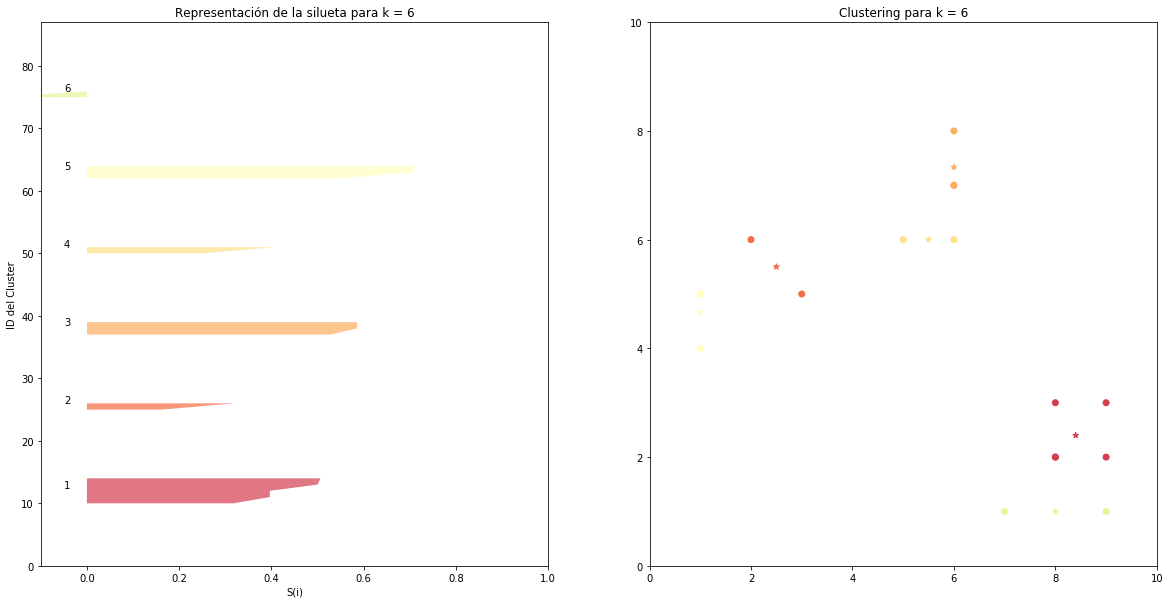

* Para k =  7  el promedio de la silueta es de : 0.3883319447429514
   - Para i =  1  la silueta del cluster vale :  0.31700053499298475
   - Para i =  2  la silueta del cluster vale :  0.32882042637679976
   - Para i =  3  la silueta del cluster vale :  0.655666655624379
   - Para i =  4  la silueta del cluster vale :  0.0
   - Para i =  5  la silueta del cluster vale :  0.263812295212263
   - Para i =  6  la silueta del cluster vale :  0.24096929517637128
   - Para i =  7  la silueta del cluster vale :  0.5664789734180768


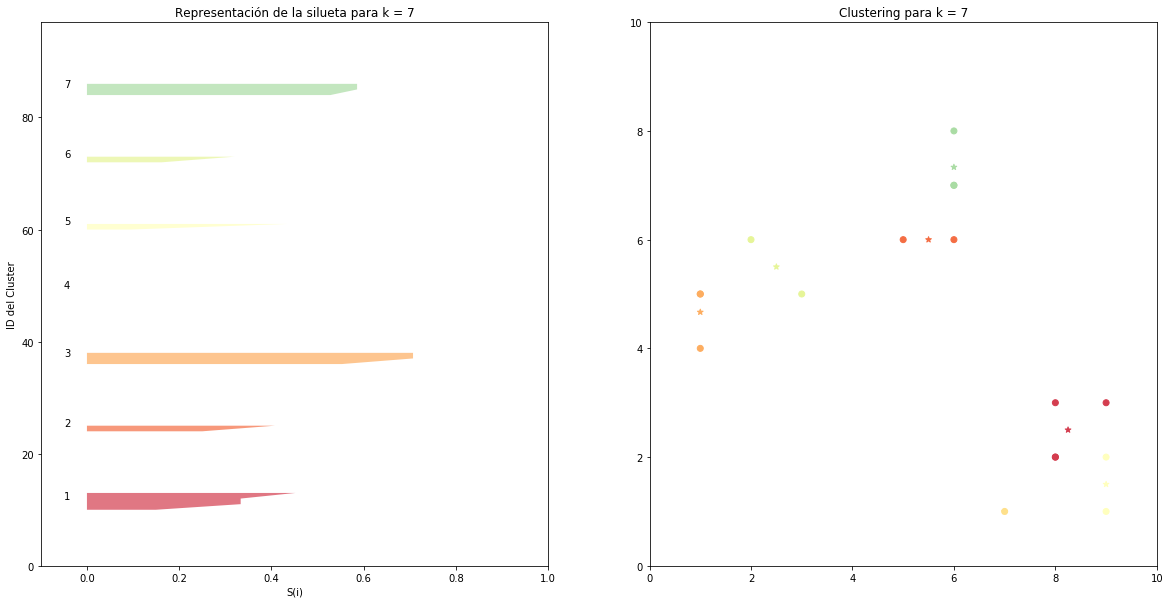

* Para k =  8  el promedio de la silueta es de : 0.3846391401618392
   - Para i =  1  la silueta del cluster vale :  0.6152265411044983
   - Para i =  2  la silueta del cluster vale :  0.31256470041698214
   - Para i =  3  la silueta del cluster vale :  0.32882042637679976
   - Para i =  4  la silueta del cluster vale :  0.3869086846339371
   - Para i =  5  la silueta del cluster vale :  0.5664789734180768
   - Para i =  6  la silueta del cluster vale :  0.0
   - Para i =  7  la silueta del cluster vale :  0.2751262658470836
   - Para i =  8  la silueta del cluster vale :  0.0


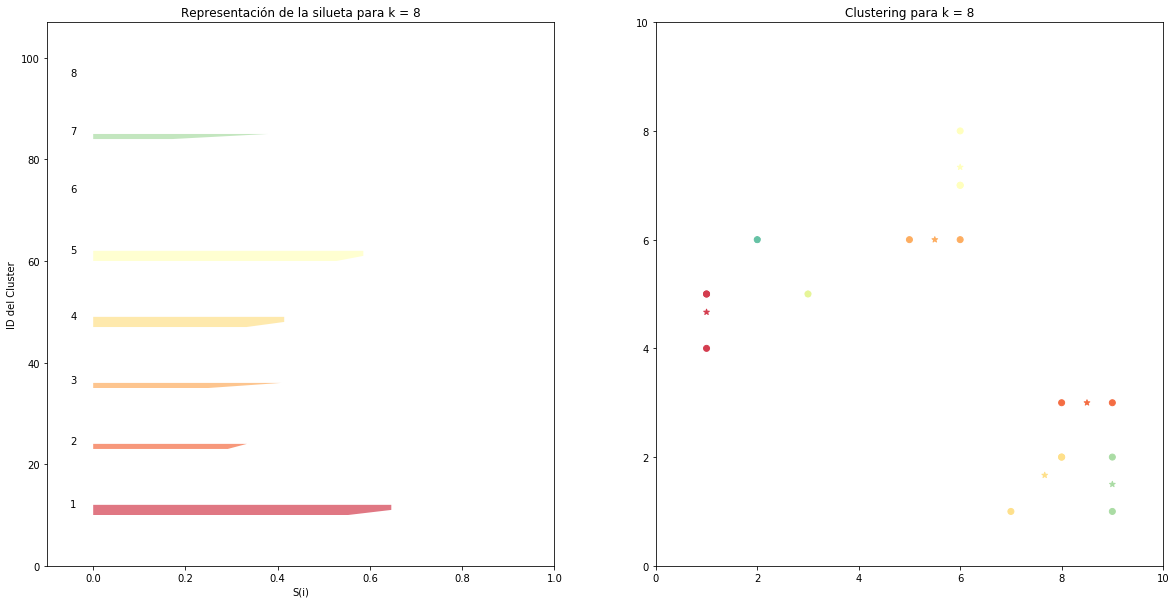

* Para k =  9  el promedio de la silueta es de : 0.33600229354373845
   - Para i =  1  la silueta del cluster vale :  0.16885435933420914
   - Para i =  2  la silueta del cluster vale :  0.0
   - Para i =  3  la silueta del cluster vale :  0.32882042637679976
   - Para i =  4  la silueta del cluster vale :  0.6152265411044983
   - Para i =  5  la silueta del cluster vale :  0.39052429175126996
   - Para i =  6  la silueta del cluster vale :  0.5664789734180768
   - Para i =  7  la silueta del cluster vale :  0.0
   - Para i =  8  la silueta del cluster vale :  0.0
   - Para i =  9  la silueta del cluster vale :  0.0


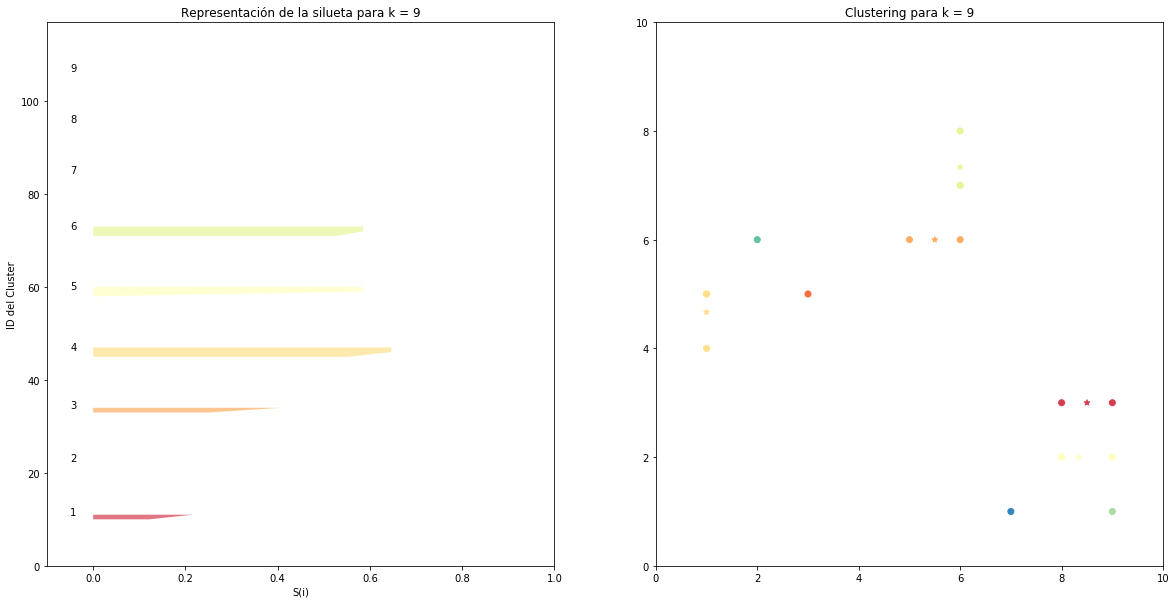

In [45]:
max_k = 10                 ## maximo número de clusters que vamos a crear
K = range(1,max_k)
ssw = []
cmap = plt.cm.get_cmap("Spectral")
color_palette = [cmap(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))


for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    ##Fabricaremos una silueta para cada cluster
    # Por seguridad, no hacemos silueta si k = 1 o k = len(X)
    if 1<k<len(X):
       ##Crear un subplot de una fila y dos columnas
        fig, (axis1,axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,10)
    
        #El primer subplot contendrá la silueta, que puede tener valores desde -1 a 1
        #En nuestro caso, ya controlamos que los valores están entre -0.1 y 1
        axis1.set_xlim([-0.1, 1.0])
        #El número de clusters a insertar determinará el tamaño de cada barra
        #El coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos 
        #entre siluetas individuales de cada cluster para separarlas.
        axis1.set_ylim([0, len(X)+ (k+1)*10])
    
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k = ",k, " el promedio de la silueta es de :",silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            #Agregamos la silueta del cluster i-ésimo
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - Para i = ", i+1, " la silueta del cluster vale : ", np.mean(ith_cluster_sv))
            #Ordenamos descendientemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
        
            #Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            #Elegimos el color del cluster
            color = color_palette[i]
            
            #Pintamos la silueta del cluster i-ésimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            
            #Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 #dejamos vacías 10 posiciones sin muestra
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        
        ##Fin de la representación de la silueta
        
    ##Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k = %s"%str(k))
    plt.scatter(x1,x2, c=label_color)
    plt.scatter(centers[0], centers[1], c=color_palette[:k], marker = "*")
    plt.show()
        

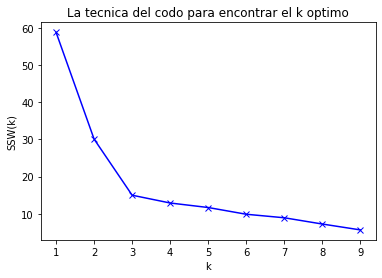

In [43]:
#Representacion del codo:
plt.plot(K,ssw,"bx-")
plt.xlabel('k')
plt.ylabel('SSW(k)')
plt.title('La tecnica del codo para encontrar el k optimo')
plt.show()

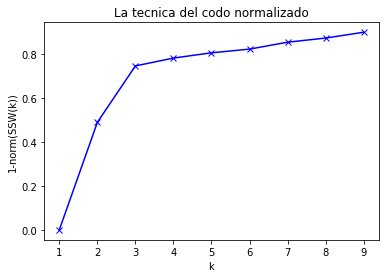

In [46]:
#Representacion del codo normalizado
plt.plot(K, 1-ssw/sst, "bx-")
plt.xlabel('k')
plt.ylabel('1-norm(SSW(k))')
plt.title('La tecnica del codo normalizado')
plt.show()